Преоразовать существующий код для распознавания последовательности рукописных символов в текст.
Написать генератор произвольной последовательности рукописных символов.

ГЕНЕРАЦИЯ НАБОРА ДАННЫХ
Сгенерировать набор текстовых строк из допустимых символов.
Каждому набору поставить в соотвествие массив изоражений соответствующих символов.
Добавить пробелы для разделения слов, символы пробелов не использовать во время классификации.

КЛАССИФИКАЦИЯ (k ближайших соседей)
Часть символов оставить для обучения классификатора . Остальные  классифицировать
по аналогии с примером mnist с прошлого занятия. Т.е. преобразовывать изображение в вектор.
Выбрать оптимальный классификатор в зависимости от k- количество соседей.
Метрика для измерения точности классификации, и выбора оптимального классификатора относительно параметра k - accuracy.

РАСПОЗНАВАНИЕ
Итак, к данному этапу Вы из массива изображений "восстановили" текст.
Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.
Рассчитайте метрику CER.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import cv2

# Путь к папке с данными
data_dir = 'data'

# Сбор данных
X = []
y = []

# Проходим по каждой папке, соответствующей метке
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        # Обрабатываем каждый файл изображения в папке метки
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Ошибка загрузки изображения: {img_path}")
                continue
            # Изменяем размер изображения на 32x32 пикселя
            img = cv2.resize(img, (32, 32))
            # Преобразуем изображение в одномерный массив и добавляем в X
            X.append(img.flatten())
            # Добавляем метку изображения в y
            y.append(label)

# Преобразуем списки в массивы numpy
X = np.array(X)
y = np.array(y)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Ошибка загрузки изображения: data\8\1
Ошибка загрузки изображения: data\FashionMNIST\raw


In [2]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           (       0.87      1.00      0.93      2814
           )       0.90      1.00      0.95      2817
           +       0.98      0.98      0.98      5043
           ,       0.43      0.87      0.57       335
           -       0.97      1.00      0.98      6773
           0       0.99      0.95      0.97      1421
           1       0.94      0.96      0.95      5349
           2       0.98      0.95      0.96      5144
           3       0.96      0.96      0.96      2194
           4       0.98      0.89      0.93      1454
           5       0.96      0.84      0.90       714
           6       0.99      0.79      0.88       646
           7       1.00      0.86      0.92       575
           8       1.00      0.81      0.90       642
           9       1.00      0.16      0.28       130
           X       1.00      0.95      0.97      5358
           h       1.00      0.89      0.94       301
           t       0.98    

In [3]:
import joblib
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [9]:
import random

path_to_folder = 'data' # путь к папке с данными
name_folders = [x[0].split('\\')[-1] for x in os.walk(path_to_folder)]
name_folders = name_folders[1:]
class_idx = [i for i in range(len(name_folders))]
dict_folders = {name_folders[i]:class_idx[i] for i in range(len(class_idx))}

a,b = [0]*5,[0]*5
for i in range(5):
    a[i]=int(random.uniform(0,21))
    b[i]=[key for key, value in dict_folders.items() if value == a[i]]

In [10]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def show_image_from_folder(folder, filename):
    img_path = os.path.join(folder, filename)
    img = cv2.imread(img_path)
    if img is not None:
        plt.imshow(img)
        plt.axis('off')
        plt.show()

folder_path = './data/'+str(b[0][0])
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
random_file = random.choice(files)


img_01 = Image.open(folder_path+'/'+random_file)
img_size = img_01.size

In [11]:
new_im = Image.new('RGB', (5*img_size[0],img_size[1]), (250,250,250))

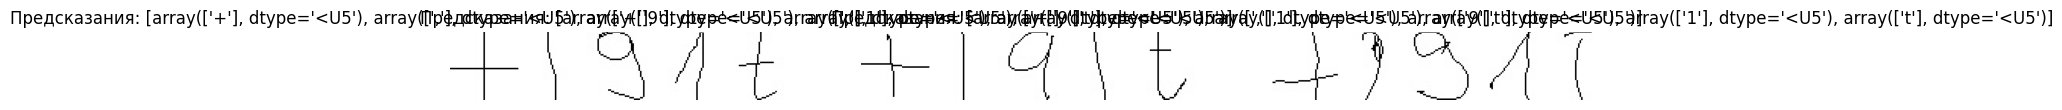

In [12]:
# Массив для хранения предсказаний
results = []
images = []  # Для хранения сгенерированных изображений

# Генерация трех разных изображений
for j in range(3):
    result = []
    # Создаем пустое изображение, которое будет составлено из 5 случайных изображений
    new_im = Image.new('RGB', (5 * img_size[0], img_size[1]))

    for i in range(5):
        # Путь к папке с изображениями
        folder_path = './data/' + str(b[i][0])
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        
        # Выбираем случайный файл из папки
        random_file = random.choice(files)
        img = Image.open(os.path.join(folder_path, random_file))
        
        # Изменяем размер изображения для предсказания
        img2 = cv2.resize(np.array(img), (32, 32))
        
        # Делаем предсказание и добавляем в результат
        result.append(knn.predict(img2.flatten().reshape(1, -1)))
        
        # Вставляем изображение в итоговое изображение
        new_im.paste(img, (i * img.size[0], 0))
    
    # Сохраняем предсказания для текущего изображения
    results.append(result)
    images.append(new_im)  # Сохраняем итоговое изображение

# Выводим предсказания и визуализируем изображения
plt.figure(figsize=(15, 5))

for j, img in enumerate(images):
    plt.subplot(1, 3, j + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Предсказания: {results[j]}')

plt.show()


In [13]:
b

[['+'], [','], ['9'], ['1'], ['t']]

In [14]:
result

[array(['+'], dtype='<U5'),
 array([','], dtype='<U5'),
 array(['9'], dtype='<U5'),
 array(['1'], dtype='<U5'),
 array(['t'], dtype='<U5')]

In [15]:
result = np.char.replace(result, result[2][0], ' ')
result

array([['+'],
       [','],
       [' '],
       ['1'],
       ['t']], dtype='<U1')

In [16]:
need, inp = '', ''
for i in range(5):
    need += str(b[i][0])
    inp += str(result[i][0])
print(need,'   ', inp)

+,91t     +, 1t


In [17]:
#расчет cer
import editdistance

need = need.replace(" ", "").lower()
inp = inp.replace(" ", "").lower()
distance = editdistance.eval(need, inp)
N = len(need)
if N == 0:
    cer_value = 0.0
cer_value = distance / N

cer_value

0.2